# DATH#2: AdventureWorks2012

Nhóm PTDL06

Thành viên:

*   Nguyễn Trần Ái Nguyên - 18120217 

#Import

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

     |████████████████████████████████| 62 kB 657 kB/s 


In [ ]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
%config Completer.use_jedi = False

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cau2.csv to cau2.csv


18120217 - Nguyễn Trần Ái Nguyên

#Tìm hiểu và mô tả ý nghĩa các biến trong tập dữ liệu.


In [ ]:
# Biến đổi file vào dataframe

In [ ]:
import pandas as pd
import numpy as np
df_data=pd.read_csv("cau2.csv")
df=pd.DataFrame(df_data)
#df=pd.DataFrame(df_data, columns = ['BusinessEntityID', 'MaritalStatus', 'YearlyIncome','Gender','TotalChildren','NumberChildrenAtHome','Education','Occupation','HomeOwnerFlag','NumberCarsOwned','BikeBuyer'])
df


,BusinessEntityID,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwnerFlag,NumberCarsOwned,BikeBuyer
0,14116,S,0-25000,F,2.0,2.0,High School,Manual,1.0,0.0,1
1,14173,S,25001-50000,M,4.0,2.0,High School,Skilled Manual,1.0,2.0,0
2,14175,S,25001-50000,M,1.0,0.0,Bachelors,Clerical,0.0,1.0,0
3,14182,S,25001-50000,F,2.0,0.0,Partial College,Skilled Manual,1.0,2.0,1
4,14209,S,0-25000,F,0.0,0.0,High School,Manual,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
19967,2343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19968,2341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19969,2318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19970,2316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#Khám phá dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19972 entries, 0 to 19971
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BusinessEntityID      19972 non-null  int64  
 1   MaritalStatus         18484 non-null  object 
 2   YearlyIncome          18484 non-null  object 
 3   Gender                18484 non-null  object 
 4   TotalChildren         18484 non-null  float64
 5   NumberChildrenAtHome  18484 non-null  float64
 6   Education             18484 non-null  object 
 7   Occupation            18484 non-null  object 
 8   HomeOwnerFlag         18484 non-null  float64
 9   NumberCarsOwned       18484 non-null  float64
 10  BikeBuyer             19972 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.7+ MB


In [ ]:
#Thống kê các cột có giá trị null
df.isnull().sum().sort_values(ascending=False)

NumberCarsOwned         1488
HomeOwnerFlag           1488
Occupation              1488
Education               1488
NumberChildrenAtHome    1488
TotalChildren           1488
Gender                  1488
YearlyIncome            1488
MaritalStatus           1488
BikeBuyer                  0
BusinessEntityID           0
dtype: int64

Chỉ có 2 cột BikeBuyer và BusinessEntityID không có giá trị NULL

In [ ]:
#%các giá trị null trong cột
df.isnull().sum().sort_values(ascending=False)
for column in df.columns:
  percent=df[column].isnull().mean()
  print(f'{column}:{round(percent*100,3)}')

BusinessEntityID:0.0
MaritalStatus:7.45
YearlyIncome:7.45
Gender:7.45
TotalChildren:7.45
NumberChildrenAtHome:7.45
Education:7.45
Occupation:7.45
HomeOwnerFlag:7.45
NumberCarsOwned:7.45
BikeBuyer :0.0


## drop row missing data

In [ ]:
df.dropna()

,BusinessEntityID,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwnerFlag,NumberCarsOwned,BikeBuyer
0,14116,S,0-25000,F,2.0,2.0,High School,Manual,1.0,0.0,1
1,14173,S,25001-50000,M,4.0,2.0,High School,Skilled Manual,1.0,2.0,0
2,14175,S,25001-50000,M,1.0,0.0,Bachelors,Clerical,0.0,1.0,0
3,14182,S,25001-50000,F,2.0,0.0,Partial College,Skilled Manual,1.0,2.0,1
4,14209,S,0-25000,F,0.0,0.0,High School,Manual,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
19615,14445,S,50001-75000,M,0.0,0.0,Partial College,Skilled Manual,0.0,2.0,0
19616,14446,S,50001-75000,M,1.0,0.0,Partial College,Skilled Manual,0.0,1.0,1
19617,14075,S,0-25000,M,5.0,3.0,Partial High School,Manual,1.0,2.0,1
19618,14084,S,50001-75000,M,1.0,0.0,Bachelors,Professional,1.0,1.0,1


In [ ]:
sum(df.duplicated())

0

=> Không có dữ liệu trùng

In [ ]:
df.describe(include='all')

,BusinessEntityID,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwnerFlag,NumberCarsOwned,BikeBuyer
count,19972.000000,18484,18484,18484,18484.000000,18484.000000,18484,18484,18484.000000,18484.000000,19972.000000
unique,NaN,2,5,2,NaN,NaN,5,5,NaN,NaN,NaN
top,NaN,M,25001-50000,M,NaN,NaN,Bachelors,Professional,NaN,NaN,NaN
freq,NaN,10011,5704,9351,NaN,NaN,5356,5520,NaN,NaN,NaN
mean,10763.079411,NaN,NaN,NaN,1.844352,1.004058,NaN,NaN,0.676369,1.502705,0.486631
std,5814.133272,NaN,NaN,NaN,1.612408,1.522660,NaN,NaN,0.467874,1.138394,0.499834
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,5798.750000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,1.000000,0.000000
50%,10791.500000,NaN,NaN,NaN,2.000000,0.000000,NaN,NaN,1.000000,2.000000,0.000000
75%,15784.250000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,1.000000,2.000000,1.000000


column BAD là cột định danh

column MaritalStatus, YearlyIncome, Gender, Education, Occupation là dữ liệu String nên không thể mô tả

column TotalChildren

In [ ]:
# Độ lệch chuẩn chỉ bằng 1.612408	 có nghĩa là có số trẻ thấp hơn điểm trung bình nhiêu và cũng có số trẻ lớn hơn điểm trung bình nhiêu
# mean(0) < mode(2) < median(3). Vậy dữ liệu phân phối phân phối lệch phải
# Min (0) cách Max (5) . Vậy range của dữ liệu rất ngắn [0; 5]

column NumberChildrenAtHome

In [ ]:
# Độ lệch chuẩn bằng 1.522660 có nghĩa là có số trẻ tại nhà thấp hơn điểm trung bình nhiêu và cũng có số trẻ tại nhà lớn hơn điểm trung bình nhiêu
# Mode (0) = median (0) < mean (2). Vậy có nghĩa dữ liệu phân phối lệch phải
# Min (0) cách Max (5) . Vậy range của dữ liệu rất ngắn [0; 5]

column HomeOwnerFlag	

In [ ]:
# Độ lệch chuẩn bằng 0.467874 chứng tỏ Số lượng khách có sở hữu nhà tập trung quanh điểm trung bình (0.676369	). Vậy có thể cho là phần lớn khách có nhà
# Mode (0) < median (1)) = mean (1). Vậy dữ liệu phân phối lệch phải
# Min (0) cách Max (1) . Vậy range của dữ liệu [0; 1]

column NumberCarsOwned

In [ ]:
# Độ lệch chuẩn bằng 	1.138394	có nghĩa là có số xe sở hữu hiện tại thấp hơn điểm trung bình và cũng có số xe sở hữu hiện tại lớn hơn điểm trung bình
# Mode (1) < median (2) = mean (2). Vậy dữ liệu phân phối lệch phải
# Min (0) cách Max (4). Vậy range của dữ liệu [0;4]

column	BikeBuyer

In [ ]:
# Độ lệch chuẩn bằng 	0.499834 chứng tỏ Số lượng khách mua xe đạp tập trung quanh điểm trung bình (0.486631). Vậy có thể cho phần lớn là khách mua xe đạp
# Mode (0) = median (0) < mean (1). Vậy dữ liệu phân phối lệch phải
# Min (0) cách Max (1) . Vậy range của dữ liệu [0; 1]

In [ ]:
df.columns

Index(['BusinessEntityID', 'MaritalStatus', 'YearlyIncome', 'Gender',
       'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation',
       'HomeOwnerFlag', 'NumberCarsOwned', 'BikeBuyer '],
      dtype='object')

Có 11 cột

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08a87a1f50>,
      dtype=object)

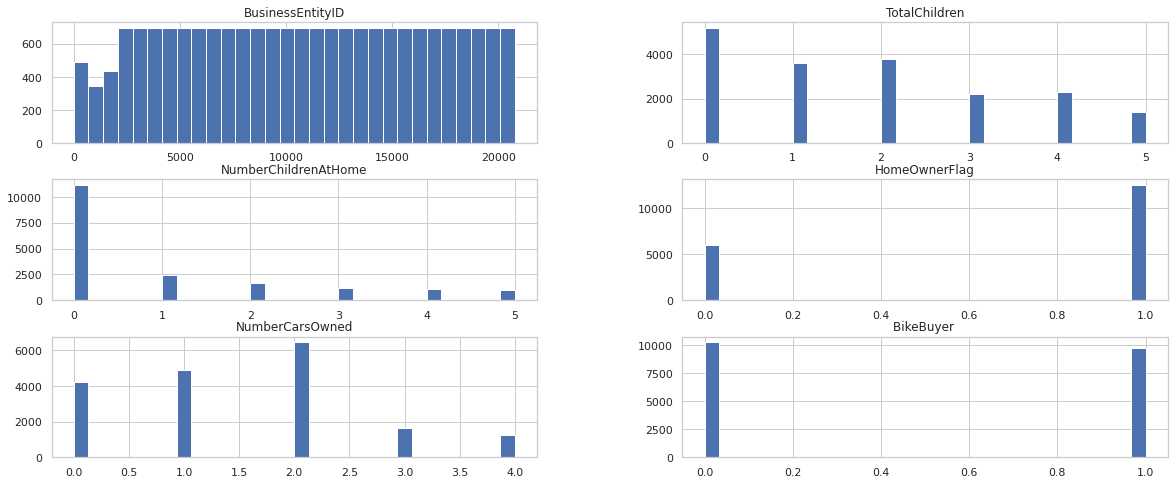

In [ ]:
# Histogramas das variávis explicativa numericas 
numeric_feats = [c for c in df.columns if df[c].dtype != 'object'and c not in ['BikeBuyer']]
df_numeric_feats = df[numeric_feats]

df_numeric_feats.hist(figsize=(20,8), bins=30)

TotalChildren, NumberChildrenAtHome số trẻ em phân phối không đồng đều. Phần lớn khong có trẻ, trẻ tại nhà

HomeOwerFlag phần lớn khách có nhà

NumberCarOwned số xe khách sở hữu phân phối không đồng đều. Phần lớn khách có xe 

BikeBuyer số khách mua và không mua xấp xỉ nha. Khách không mua nhiều hơn khách mua

In [ ]:
category_features = df.select_dtypes(include=['object', 'bool']).columns.values

In [ ]:
for col in category_features:
    print(f"\033[1m\033[94m{col} \n{20 * '-'}\033[0m")    
    print(df[col].value_counts(), "\n")
    
print(df.nunique(axis=1))

MaritalStatus 
--------------------
M    10011
S     8473
Name: MaritalStatus, dtype: int64 

YearlyIncome 
--------------------
25001-50000            5704
50001-75000            5476
0-25000                2922
75001-100000           2755
greater than 100000    1627
Name: YearlyIncome, dtype: int64 

Gender 
--------------------
M    9351
F    9133
Name: Gender, dtype: int64 

Education 
--------------------
Bachelors              5356
Partial College        5064
High School            3294
Graduate Degree        3189
Partial High School    1581
Name: Education, dtype: int64 

Occupation 
--------------------
Professional      5520
Skilled Manual    4577
Management        3075
Clerical          2928
Manual            2384
Name: Occupation, dtype: int64 

0         9
1        10
2         8
3         9
4         9
         ..
19967     2
19968     2
19969     2
19970     2
19971     2
Length: 19972, dtype: int64


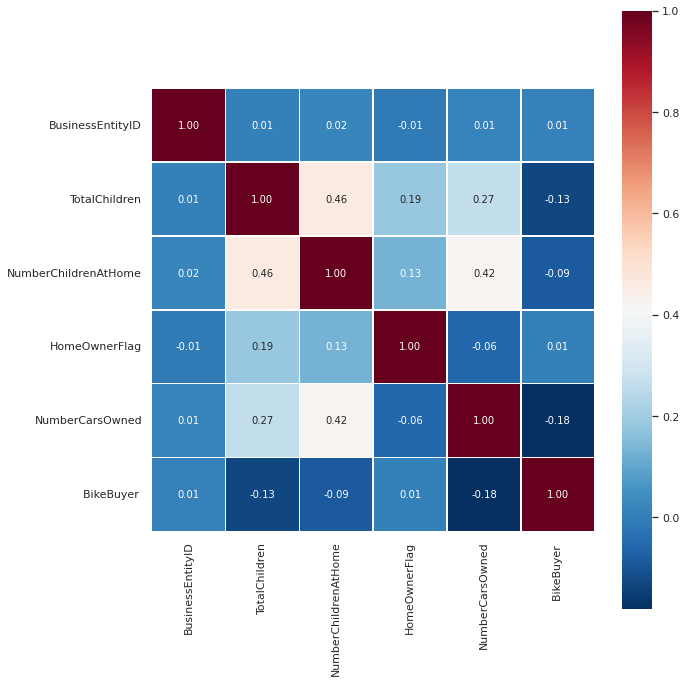

In [ ]:
# Visualize feature correlations
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

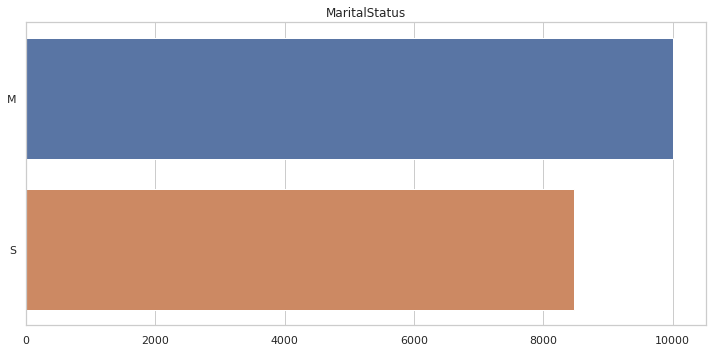

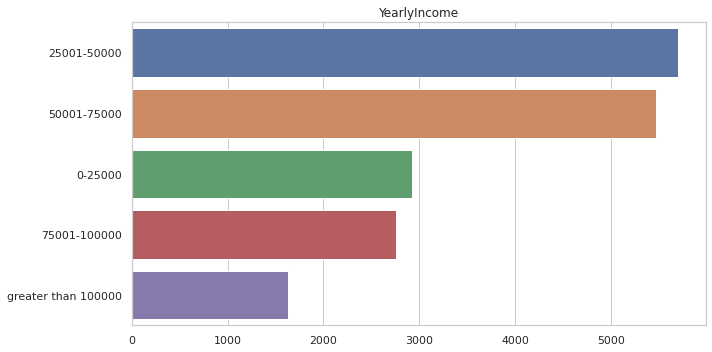

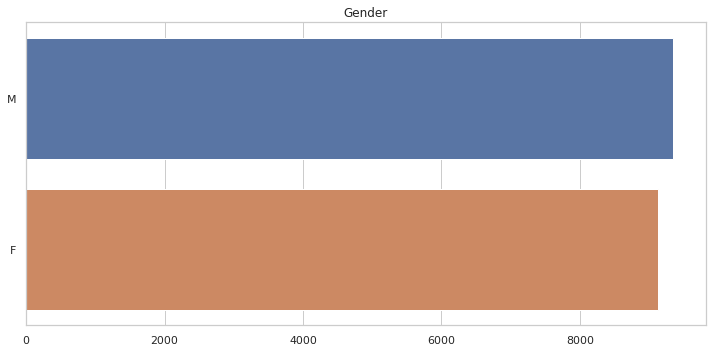

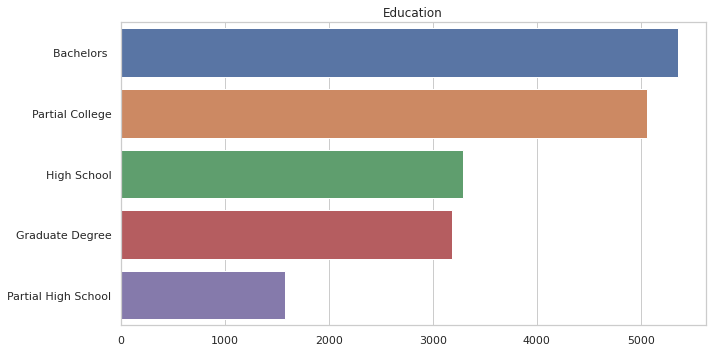

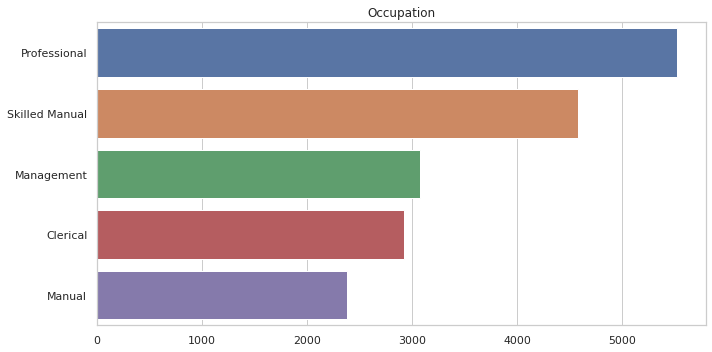

In [ ]:
for col in category_features:
    plt.figure(figsize=(10,5))    
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index, data=df)    
    plt.title(col)    
    plt.tight_layout()

MaritalStatus: phần lơn khách kết hôn

YearlyIncome: phần lớn khách có thu nhập trung bình

Gender: giới tính xấp xỉ nhau

Education: phần lớn khách có mức học thức đại học/ cao đẳng

Occupation: phần lớn khách có công việc chuyên môn


In [ ]:
df.isnull().sum()

BusinessEntityID           0
MaritalStatus           1488
YearlyIncome            1488
Gender                  1488
TotalChildren           1488
NumberChildrenAtHome    1488
Education               1488
Occupation              1488
HomeOwnerFlag           1488
NumberCarsOwned         1488
BikeBuyer                  0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

BusinessEntityID        0
MaritalStatus           0
YearlyIncome            0
Gender                  0
TotalChildren           0
NumberChildrenAtHome    0
Education               0
Occupation              0
HomeOwnerFlag           0
NumberCarsOwned         0
BikeBuyer               0
dtype: int64

In [ ]:
df.head()

,BusinessEntityID,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwnerFlag,NumberCarsOwned,BikeBuyer
0,14116,S,0-25000,F,2.0,2.0,High School,Manual,1.0,0.0,1
1,14173,S,25001-50000,M,4.0,2.0,High School,Skilled Manual,1.0,2.0,0
2,14175,S,25001-50000,M,1.0,0.0,Bachelors,Clerical,0.0,1.0,0
3,14182,S,25001-50000,F,2.0,0.0,Partial College,Skilled Manual,1.0,2.0,1
4,14209,S,0-25000,F,0.0,0.0,High School,Manual,0.0,2.0,1


#Train/test

In [ ]:
df_x = [df["BusinessEntityID"],df["MaritalStatus"],df["YearlyIncome"],df["Gender"],df["TotalChildren"],df["NumberChildrenAtHome"],df["Education"],df["Occupation"],df["HomeOwnerFlag"],df["NumberCarsOwned"]] #depend
x_headers = ["BusinessEntityID","MaritalStatus","YearlyIncome","Gender","TotalChildren","NumberChildrenAtHome","Education","Occupation","HomeOwnerFlag","NumberCarsOwned"]
x=pd.concat(df_x, axis=1, keys=x_headers)
x

,BusinessEntityID,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwnerFlag,NumberCarsOwned
0,14116,S,0-25000,F,2.0,2.0,High School,Manual,1.0,0.0
1,14173,S,25001-50000,M,4.0,2.0,High School,Skilled Manual,1.0,2.0
2,14175,S,25001-50000,M,1.0,0.0,Bachelors,Clerical,0.0,1.0
3,14182,S,25001-50000,F,2.0,0.0,Partial College,Skilled Manual,1.0,2.0
4,14209,S,0-25000,F,0.0,0.0,High School,Manual,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
19615,14445,S,50001-75000,M,0.0,0.0,Partial College,Skilled Manual,0.0,2.0
19616,14446,S,50001-75000,M,1.0,0.0,Partial College,Skilled Manual,0.0,1.0
19617,14075,S,0-25000,M,5.0,3.0,Partial High School,Manual,1.0,2.0
19618,14084,S,50001-75000,M,1.0,0.0,Bachelors,Professional,1.0,1.0


In [ ]:
y=df.drop(['BusinessEntityID','MaritalStatus','YearlyIncome','Gender','TotalChildren','NumberChildrenAtHome','Education','Occupation','HomeOwnerFlag','NumberCarsOwned'],axis=1)
y

,BikeBuyer
0,1
1,0
2,0
3,1
4,1
...,...
19615,0
19616,1
19617,1
19618,1


In [ ]:
x=pd.get_dummies(x,drop_first=True)

In [ ]:
#Chia dữ liệu train & test: 80:20.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/4,random_state=0)

In [ ]:
x_test.shape

(4621, 19)

In [ ]:
y_train.shape

(13863, 1)

In [ ]:
y_test.shape

(4621, 1)

In [ ]:
x_train.shape

(13863, 19)

In [ ]:
# Đào tạo mô hình hồi quy logistic cơ bản với gói đào tạo
lm = LogisticRegression(solver='lbfgs',random_state=0)
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
y_pred
print("intercept ")
print(lm.intercept_)
print("")
print("coefficients ")
print(lm.coef_)

intercept 
[0.25610801]

coefficients 
[[-3.24766105e-06 -1.77019063e-01  4.61592700e-02  2.30408786e-01
  -2.94854892e-01  3.42725830e-01  5.86695957e-02  1.89259819e-01
   1.03943692e-01  2.16635840e-01  3.31107708e-02  5.05399482e-02
  -1.00574641e-01  5.45771101e-02 -2.32124559e-01  1.06133879e-01
  -1.99935802e-01  1.85915407e-01  2.73418557e-03]]


#Lựa chọn metric cho bài toán.

$$
	Accurancy= \frac{TP+TN}{TP+TN+FP+FN}  $$
  $$
	Precision= \frac{TP}{TP+FP}  $$
  $$
	Recall= \frac{TP}{TP+FN}  $$
  $$
	F1= \frac{2TP}{2TP+FP+FN}  $$

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
p1 = precision_score(y_test, y_pred, average="macro")
r1 = recall_score(y_test, y_pred, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)


accuracy score :  0.6057130491235664
f1 score :  0.605603541962717
precision score :  0.6057686033779324
recall score :  0.6056709653587014


Nhận xét: 

accurancy xấp xỉ 0.6 --> Mức độ dự đoán nợ xấu chính xác khá thấp

preccision xấp xỉ 0.65 --> mức độ báo động nhầm khá cao

recall xấp xỉ 0.6 -> mức độ nhận nhầm, sai sót cao

F1 xấp xỉ 0,6 --> mức độ cân bằng giữa recall và preccision khá cao

#4. Xây dựng model, triển khai và đánh giá mô hình

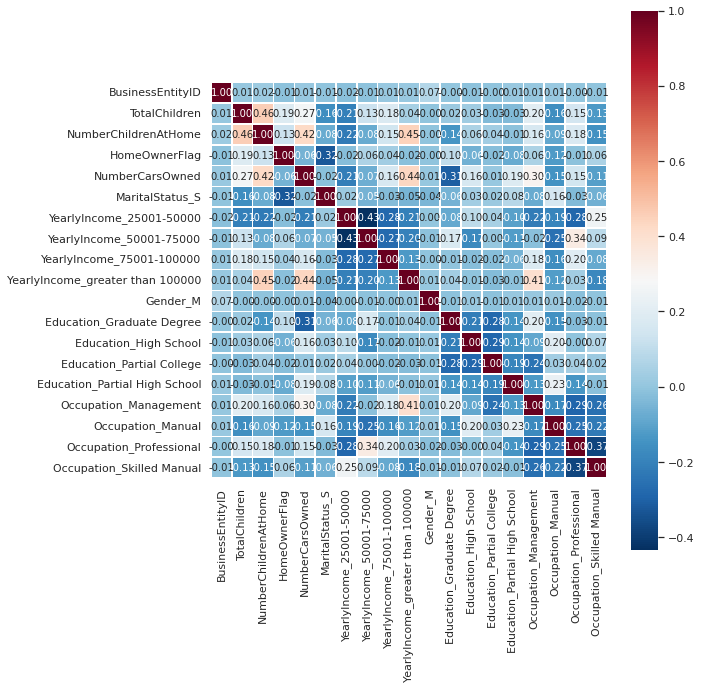

In [ ]:
# Visualize feature correlations
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(x._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [ ]:
#Build a logistic regression model
model = LogisticRegression()

In [ ]:
#Training the model again
model.fit(x_train_scaled, y_train)

LogisticRegression()

1. Đánh giá trên tập train

In [ ]:
train_acc = model.score(x_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 63.40618913655053


2. Đánh giá trên tập test

In [ ]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 60.57130491235664


**Tạo báo phân loại**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60      2304
           1       0.60      0.62      0.61      2317

    accuracy                           0.61      4621
   macro avg       0.61      0.61      0.61      4621
weighted avg       0.61      0.61      0.61      4621



 **Ma trận nhầm lẫn**

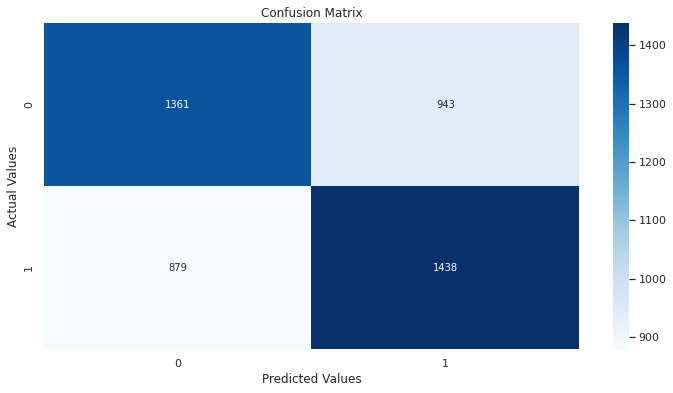

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

#Decission tree

##Helper code to visualize tree

In [ ]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

##Train tree and get predictions

In [ ]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 11
dt = DecisionTreeClassifier(max_depth=11, random_state=1)

# Fit dt to the training set
dt.fit(x_train, y_train)

# Predict test set labels
y_pred = dt.predict(x_test)
print(y_pred[0:10])

[1 0 1 1 1 0 1 0 0 1]


In [ ]:
# Predict test set labels
y_pred = dt.predict(x_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.71


Mức độ dự đoán chính xác theo Cây quyết định cao hơn mô hinh OLS

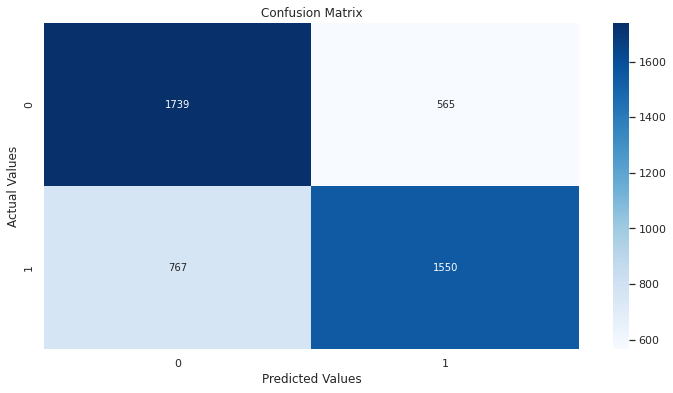

In [ ]:
cm1=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm1, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix_dt.png')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      2304
           1       0.73      0.67      0.70      2317

    accuracy                           0.71      4621
   macro avg       0.71      0.71      0.71      4621
weighted avg       0.71      0.71      0.71      4621

